### Uplift Metrics (Uplift@K)
Из-за фундаментальной проблемы casual inference мы не знаем правильных меток для объектов. В случаем uplift моделей правильных меток 2 - действие пользователя при коммуникации и без нее, следовательно, мы не можем иметь данные метки одновременно для одного объекта. 

**Решение**
1. Отсортирвать объекты по значению uplift score
2. Разбиваем распределение uplift score на бины/перцентили/децили
3. Считаем агрегированное значение таргета для бина/перцентиля/дециля (так как нет ground truth для групп Treatment и Control)

Данный метод используется для подсчета любых метрик в uplift моделировании.

#### Uplift@K
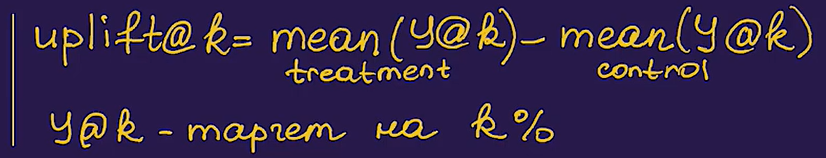
K - топ K % выборки, отсортированной по предсказанному uplift score. 

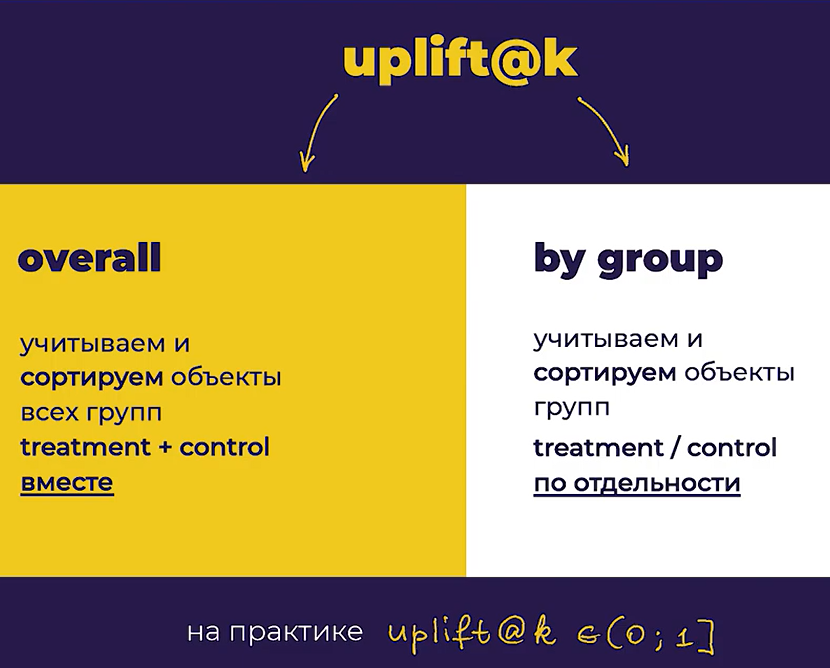

Если модель обучена хорошо, то метрика uplift@k будет принимать значения от (0, 1] -> значит **среднее значение таргета в treatment группе больше чем в control.**

Метрика также будет зависеть от:
- Значения K
    - Определяется бизнесом (бюджет ограничен 10-20% пользователей)
- Метода сортировки по группам (Control/Treatment)
- Особенностей данных

### Uplift By Percentile
Обычно используется, когда неизвестно какой K необходимо выбрать, и хочется посмотреть как будет вести себя метрика при разных значениях K. Данная метрика доступна в библиотеке sklift. Распределение uplift score разбивается на перцентили и далее считается uplift и response rate для перцентиля. 

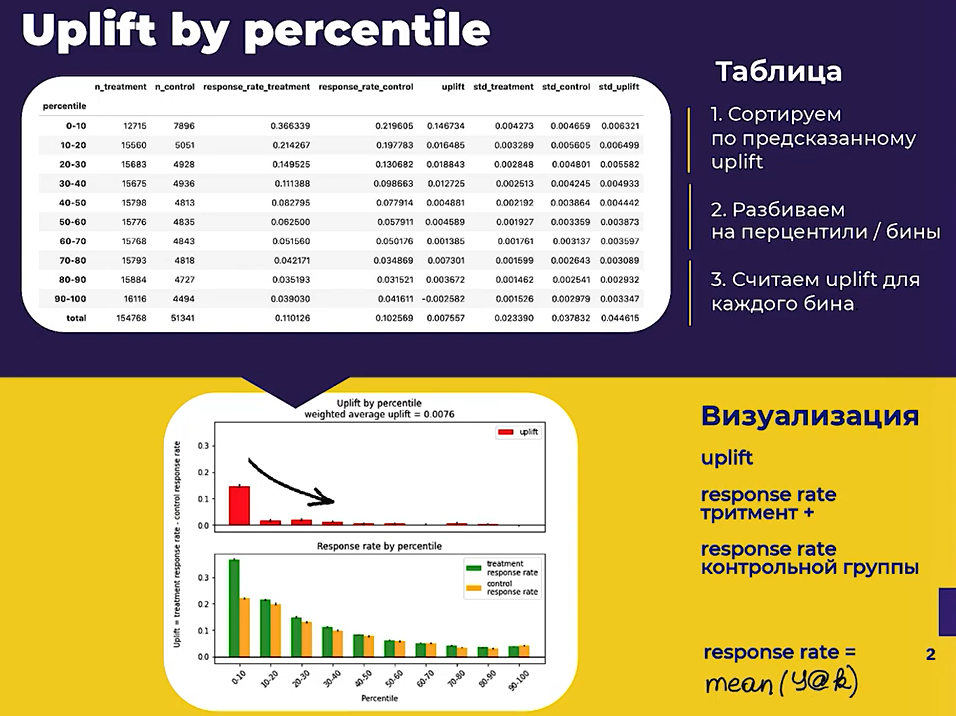

Также **важно контролировать поведение Response Rate** (доля таргета в группе) в Treatment и Control группах одновременно.

В случае хорошей uplift модели, response rate:
- Убывает слева на право (Treatment)
- Возрастает слева на право (Control)

Чем больше значение uplift для перцентиля, тем больше модель находит клиентов, положительно откликающихся на коммуникацию.

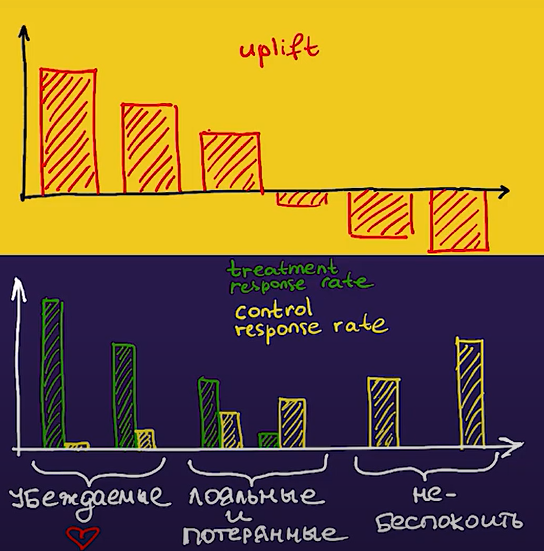

- Убеждаемые: Response Rate Treatment > Response Rate Control
- Не беспокоить: Response Rate Treatment < Response Rate Control
- Лояльные и Потерянные: Response Rate Treatment ~ Response Rate Control (моедл не различает их между собой)

Если **число лояльных и потерянных клиентов в выборке был одинаковым**, то uplift = 0 будет находиться по середине. Response rate для таких типов клиентов уравновесит друг друга, т.к. лояльные всегда реагируют позитивно, а потерянные наоборот.

### Weighted Average Uplift 
Метрика, которая обычно представляется одним значением и **позволяет сравнивать разные uplift модели между собой**. Метрика несет смысл усредненного uplift по всей выборке (считается uplift на каждом перцентиле)

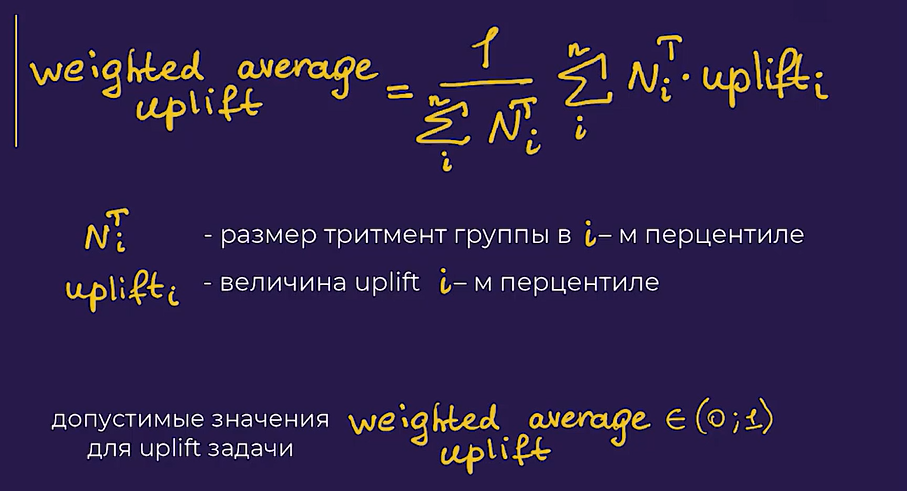

### Average Squared Deviation (ASD)
Так как uplift модели склонны к переобучению, то данная метрика помогет оценить переобученность модели на train выборке. **Чем больше значение ASD, тем больше мера переобученности модели.**

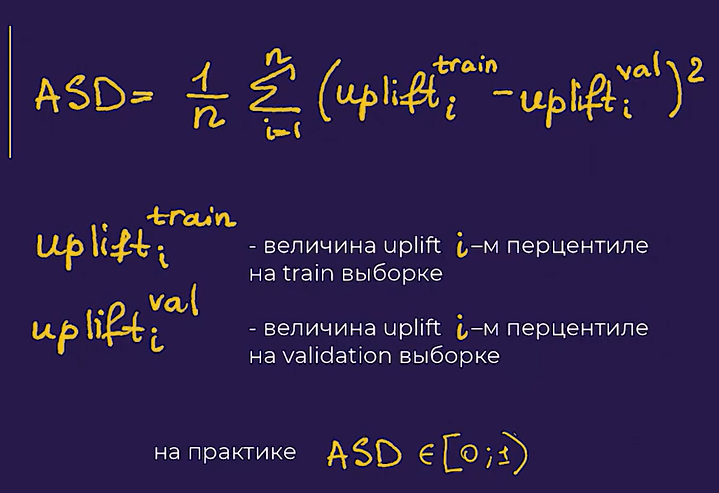

### Uplift и Qini Curves
Для Response и Look-alike моделей мы можем оценить качество, построив ROC-AUC/PR-Curves и посмотреть как ведет себя модель в зависимоти от определнного парога. Для uplift моделей есть похожий способ.  

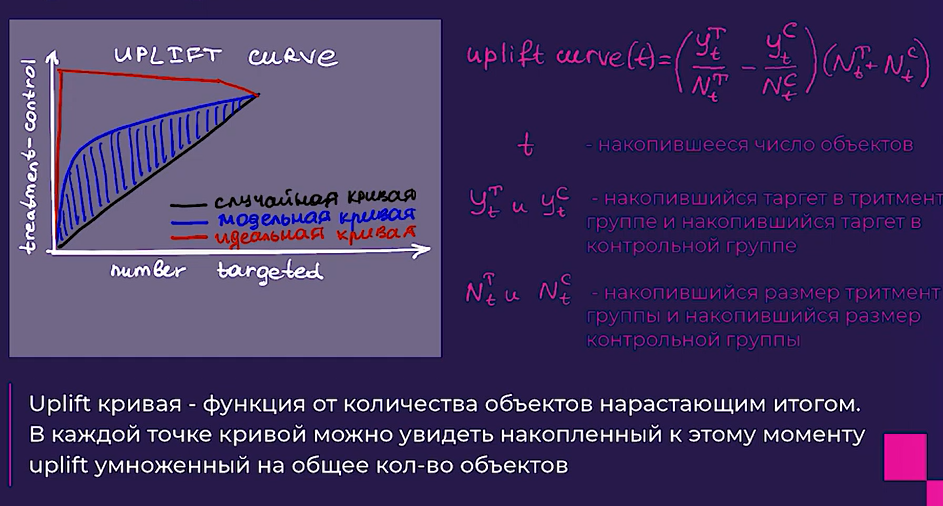

Алгоритм построения Uplift кривой
1. Отсортировать объекты по ulift score
2. Рассчитать значение по формуле для каждого парога t (от 0 до размера выборки)

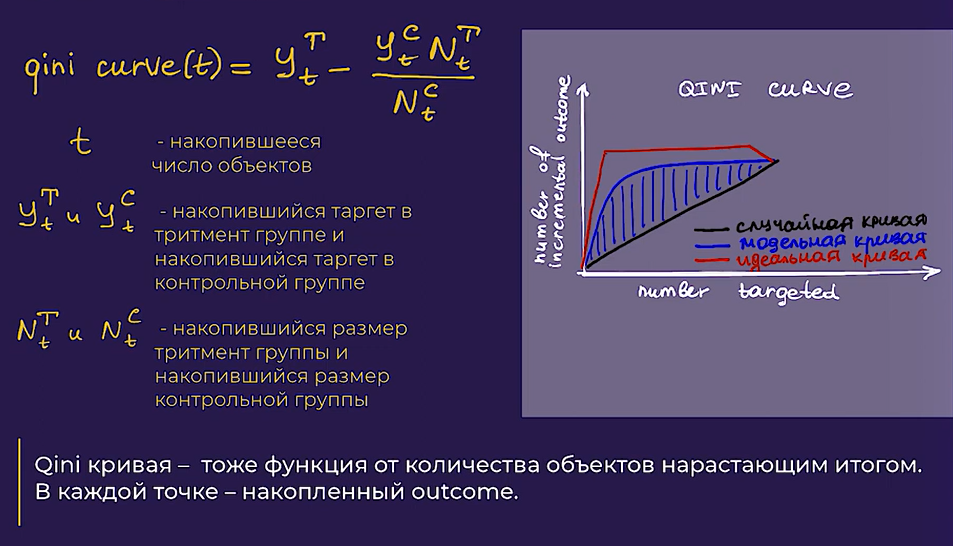

Отношение/вес, умноженный на таргет контрольной группы - недает модели поднимать на верх в ранжировании только Treatment группу.

**Связь между Uplift и Qini Curves**

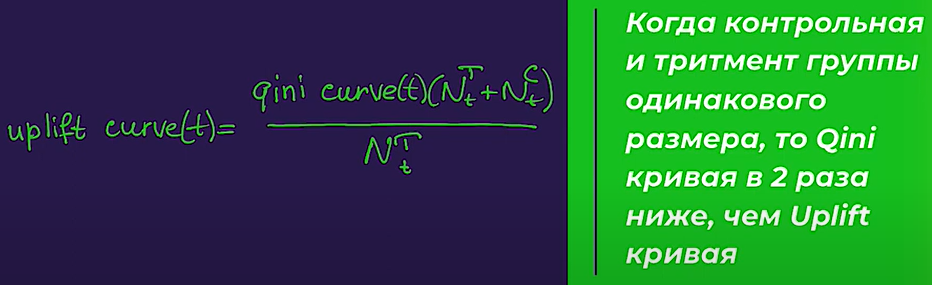

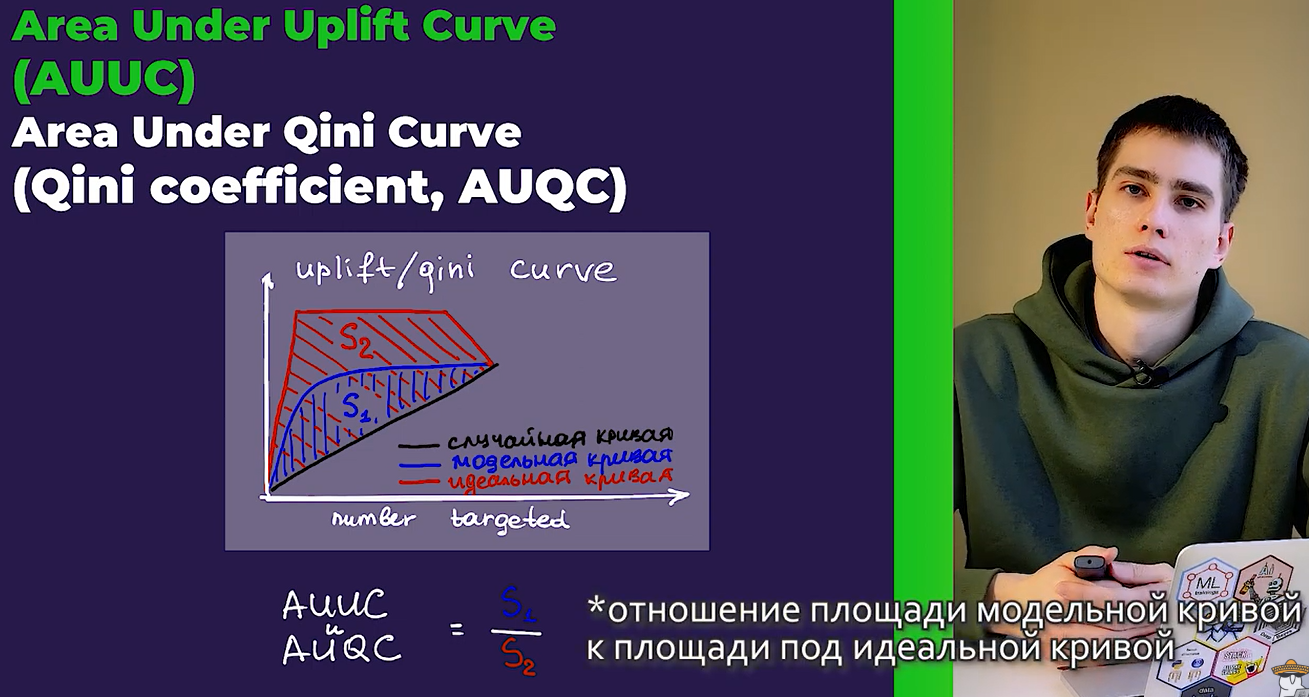